## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
from platform import python_version
python_version()

'3.9.7'

In [3]:
# Checking the number of mice.
numb_mice = merge_df["Mouse ID"].nunique()
numb_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice = merge_df[merge_df[["Mouse ID", "Timepoint"]].duplicated() == True]

dupl_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df["Mouse ID"] == 'g989', :]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df["Mouse ID"] != 'g989', :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].nunique()

clean_df_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_group = clean_df.groupby("Drug Regimen")
tumor_mean = tumor_group["Tumor Volume (mm3)"].mean()
tumor_median = tumor_group["Tumor Volume (mm3)"].median()
tumor_var = tumor_group["Tumor Volume (mm3)"].var()
tumor_std =  tumor_group["Tumor Volume (mm3)"].std()
tumor_sem = tumor_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_var, "Standard Deviation": tumor_std, "SEM":tumor_sem})

summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_group.aggregate({"Tumor Volume (mm3)":["mean", "median","var", "std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

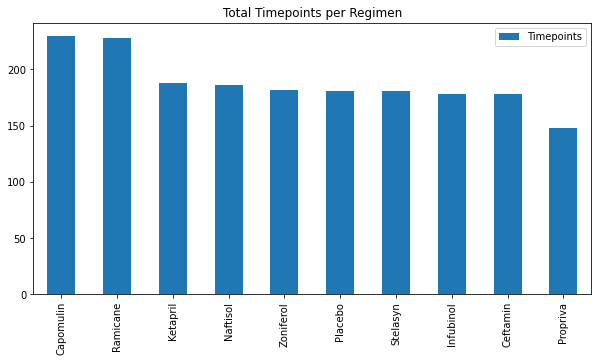

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_ct = clean_df["Drug Regimen"].value_counts()
timepoint_ct

timepoint_df = pd.DataFrame({"Timepoints": timepoint_ct})
timepoint_df

timepoint_df.plot(kind="bar", figsize=(10,5))

plt.title("Total Timepoints per Regimen")
plt.show()



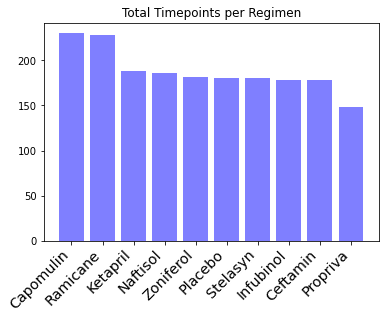

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen= timepoint_ct.index
timepoints = []

for x in timepoint_ct:
    timepoints.append(x)
    

plt.bar(drug_regimen, timepoints, color='b', alpha=0.5, align="center")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  )

plt.title("Total Timepoints per Regimen")


plt.show()


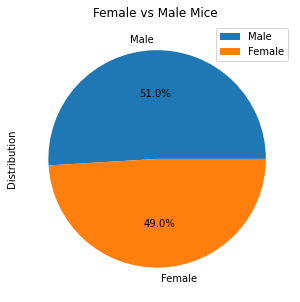

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_vct = clean_df["Sex"].value_counts()
# sex_ct = sex_vct["Mouse ID"].nunique()

sex_dist_df = pd.DataFrame({"Distribution": sex_vct})
sex_dist_df

sex_dist_df.plot(kind="pie", y = "Distribution",  autopct='%1.1f%%', figsize=(5,5))

plt.title("Female vs Male Mice ")
plt.show()


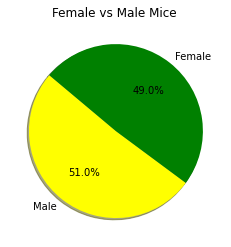

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_list= list(clean_df["Sex"].unique())
sex_dist_list = []


for x in sex_vct:
    sex_dist_list.append(x)



colors = ["yellow","green"]

plt.pie(sex_dist_list, labels=sex_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Female vs Male Mice ")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grp = clean_df.groupby("Mouse ID")

greatest_timepoint_df = mouse_grp["Timepoint"].max().to_frame()
greatest_timepoint_df.reset_index(inplace = True)
greatest_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_grp_df = pd.merge(clean_df, greatest_timepoint_df)

merge_grp_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds
    
for x in treatments:
    drug_m_reg = merge_grp_df.loc[merge_grp_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_vol.append(drug_m_reg)
    quartiles = drug_m_reg.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {x}.")
    print(f"Values above {upper_bound} could be outliers {x}.")

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers Capomulin.
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers Ramicane.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers Infubinol.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers Ceftamin.


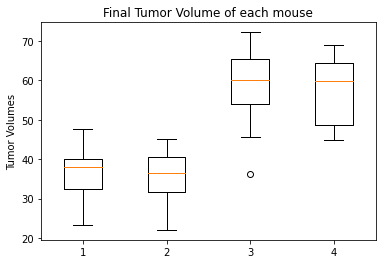

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = []

for x in treatments:
    final_tum_vol = merge_grp_df.loc[merge_grp_df["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    data.append(final_tum_vol)
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of each mouse')
ax1.set_ylabel("Tumor Volumes")
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

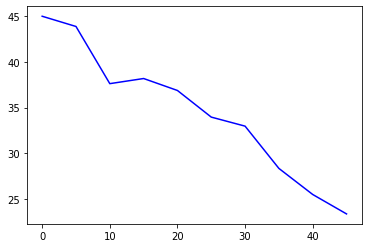

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mice_df = clean_df.set_index("Mouse ID")

vol_and_tp = mice_df.loc[["s185"], ["Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]

vol_vs_tp = plt.plot(vol_and_tp["Timepoint"], vol_and_tp["Tumor Volume (mm3)"], color = "blue",label = "Tumor Volume vs Time Point")

vol_vs_tp


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


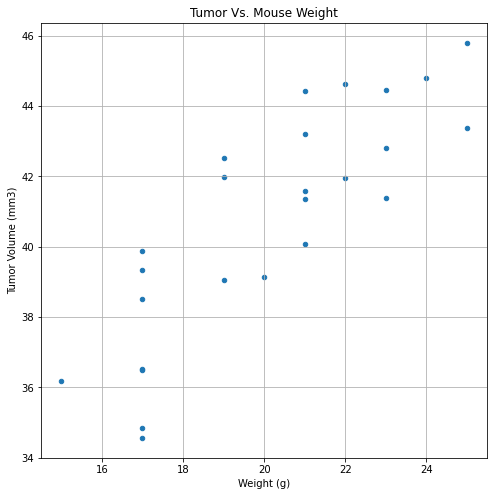

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen 
drug_loc = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

mice_grp = drug_loc.groupby("Mouse ID").mean()

vol_vs_mw = mice_grp.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), 
                          title="Tumor Vs. Mouse Weight")

mice_grp

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mice_grp.iloc[:,0]
tumor_volume = mice_grp.iloc[:,1]

correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


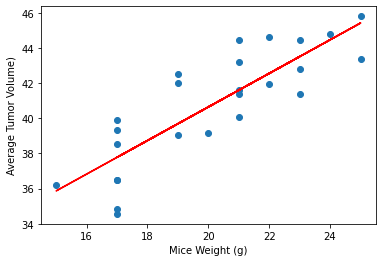

'y = 0.95x + 21.55'

In [28]:
x_values = mice_grp['Weight (g)']
y_values = mice_grp['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mice Weight (g)')
plt.ylabel('Average Tumor Volume)')
plt.show()

line_eq